In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Colab_Notebooks"
!ls

/content/drive/My Drive/Colab_Notebooks
 data	       Keras_Cat_vs_Dog_vgg16.ipynb  'Logistic regression.pdf'
 data.rar      keras_cat_vs_dog_vgg16.py
 dataset.csv   LogisticRegression.ipynb


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)
print(N, d)

20 3


In [6]:
# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'kinh nghiệm (năm)')

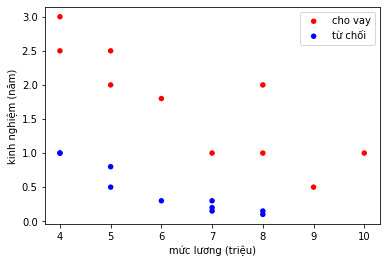

In [7]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [8]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)

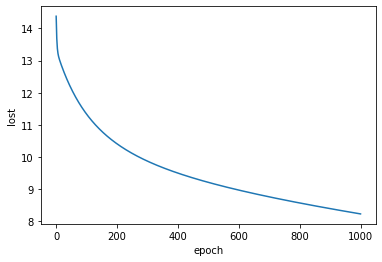

In [9]:
# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.001

for i in range(0, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    # np.dot: nhan ma tran, * / multiply : element-wise
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
plt.xlabel("epoch")
plt.ylabel("lost")
plt.plot(cost)

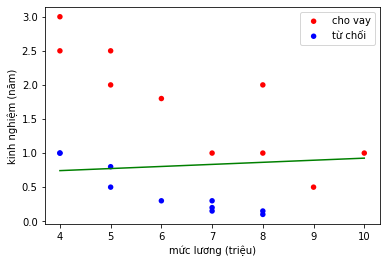

In [10]:
# Vẽ đường phân cách.
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

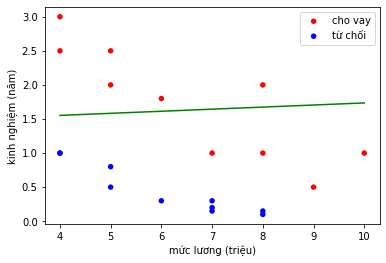

In [11]:
# Vẽ đường phân cách.
t = 0.8
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()